In [86]:
import nltk
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [4]:
filepath = "/kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv"

df = pd.read_csv(filepath)

display(df)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0.0,0.0,1.0,0.0,0.0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1.0,0.0,0.0,0.0,1.0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0.0,1.0,0.0,0.0,0.0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0.0,0.0,0.0,0.0,1.0


In [5]:
nulls = pd.DataFrame(df.isnull().sum(), columns = ['Nulls'])

display(nulls.T)

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
Nulls,3968,831,214,16,43597,43595,43596,43601,43604


In [6]:
clean_df = df.dropna(subset = ['Title', 'Review']).drop(columns = ['Materials', 'Construction', 'Color', 'Finishing', 'Durability'])

display(clean_df)

,Title,Review,Cons_rating,Cloth_class
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits
...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses


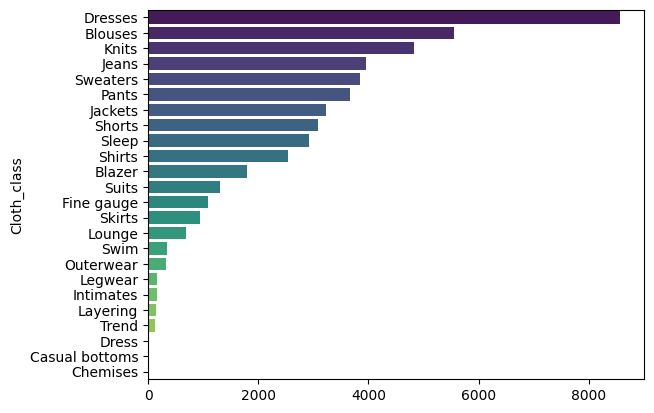

In [7]:
classes = df['Cloth_class'].value_counts()

sns.barplot(y = classes.index, x = classes.values, palette = 'viridis', orient = 'h')

plt.show()

In [8]:
def text_feature_extract(text_feature, model):
    text = model.fit_transform(text_feature)
        
    return text

In [9]:
stopwords = nltk.corpus.stopwords.words("english")

In [10]:
count_vect0 = CountVectorizer(stop_words = stopwords)

In [12]:
text_title = text_feature_extract(clean_df['Title'], count_vect0)

print(f"Number of words = {len(count_vect0.get_feature_names_out())}")

Number of words = 6550


In [13]:
text_review = text_feature_extract(clean_df['Review'], count_vect0)

print(f"Number of words = {len(count_vect0.get_feature_names_out())}")

Number of words = 19650


In [40]:
tfidf_vect0 = TfidfVectorizer(stop_words = stopwords, min_df = 4, max_df = 5000)

In [41]:
text_title = text_feature_extract(clean_df['Title'], tfidf_vect0)

print(f"Number of words = {len(tfidf_vect0.get_feature_names_out())}")

Number of words = 1990


In [42]:
text_review = text_feature_extract(clean_df['Review'], tfidf_vect0)

print(f"Number of words = {len(tfidf_vect0.get_feature_names_out())}")

Number of words = 6990


In [43]:
text_all = text_feature_extract(clean_df['Title'] + ' ' + clean_df['Review'], tfidf_vect0)

print(f"Number of words = {len(tfidf_vect0.get_feature_names_out())}")

Number of words = 7254


In [26]:
inertias = list()
ranges = list(range(7, 13))

kmeans_models = dict()

for n in ranges:
    kmeans = KMeans(n_clusters = n, n_init = 124)
    
    kmeans.fit(text_all)
    
    inertias.append(kmeans.inertia_)
    
    kmeans_models[n] = kmeans

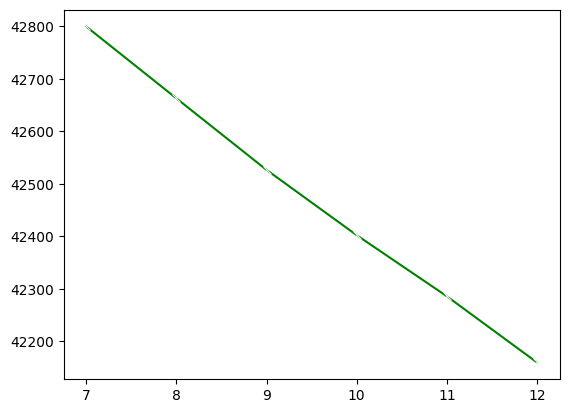

In [27]:
sns.lineplot(x = ranges, y = inertias, marker = 'x', color = 'Green')

plt.show()

In [44]:
kmeans12 = KMeans(n_clusters = 12, n_init = 304, random_state = 1)

kmeans12.fit(text_all)

KMeans(n_clusters=12, n_init=304, random_state=1)

In [45]:
cluster_df = clean_df.copy()

cluster_df['cluster'] = kmeans12.labels_

display(cluster_df)

,Title,Review,Cons_rating,Cloth_class,cluster
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,5
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses,0
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits,0
...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,1
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,6
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,1


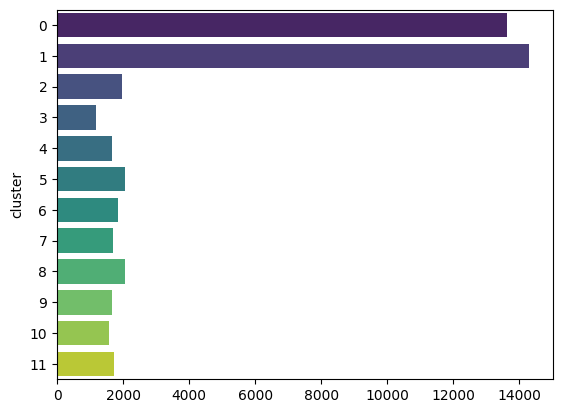

In [46]:
total_cluster = cluster_df['cluster'].value_counts()

sns.barplot(y = total_cluster.index, x = total_cluster.values, palette = 'viridis', orient = 'h')

plt.show()

In [26]:
cluster_cloth = pd.DataFrame(cluster_df.groupby(['cluster', 'Cloth_class'])[['cluster', 'Cloth_class']].value_counts()).reset_index().sort_values(by = 'Cloth_class')

display(cluster_cloth)

,cluster,Cloth_class,count
0,0,Blazer,56
47,3,Blazer,2
61,4,Blazer,1
74,5,Blazer,3
92,6,Blazer,5
...,...,...,...
132,9,Swim,1
34,1,Swim,290
91,5,Trend,1
35,1,Trend,101


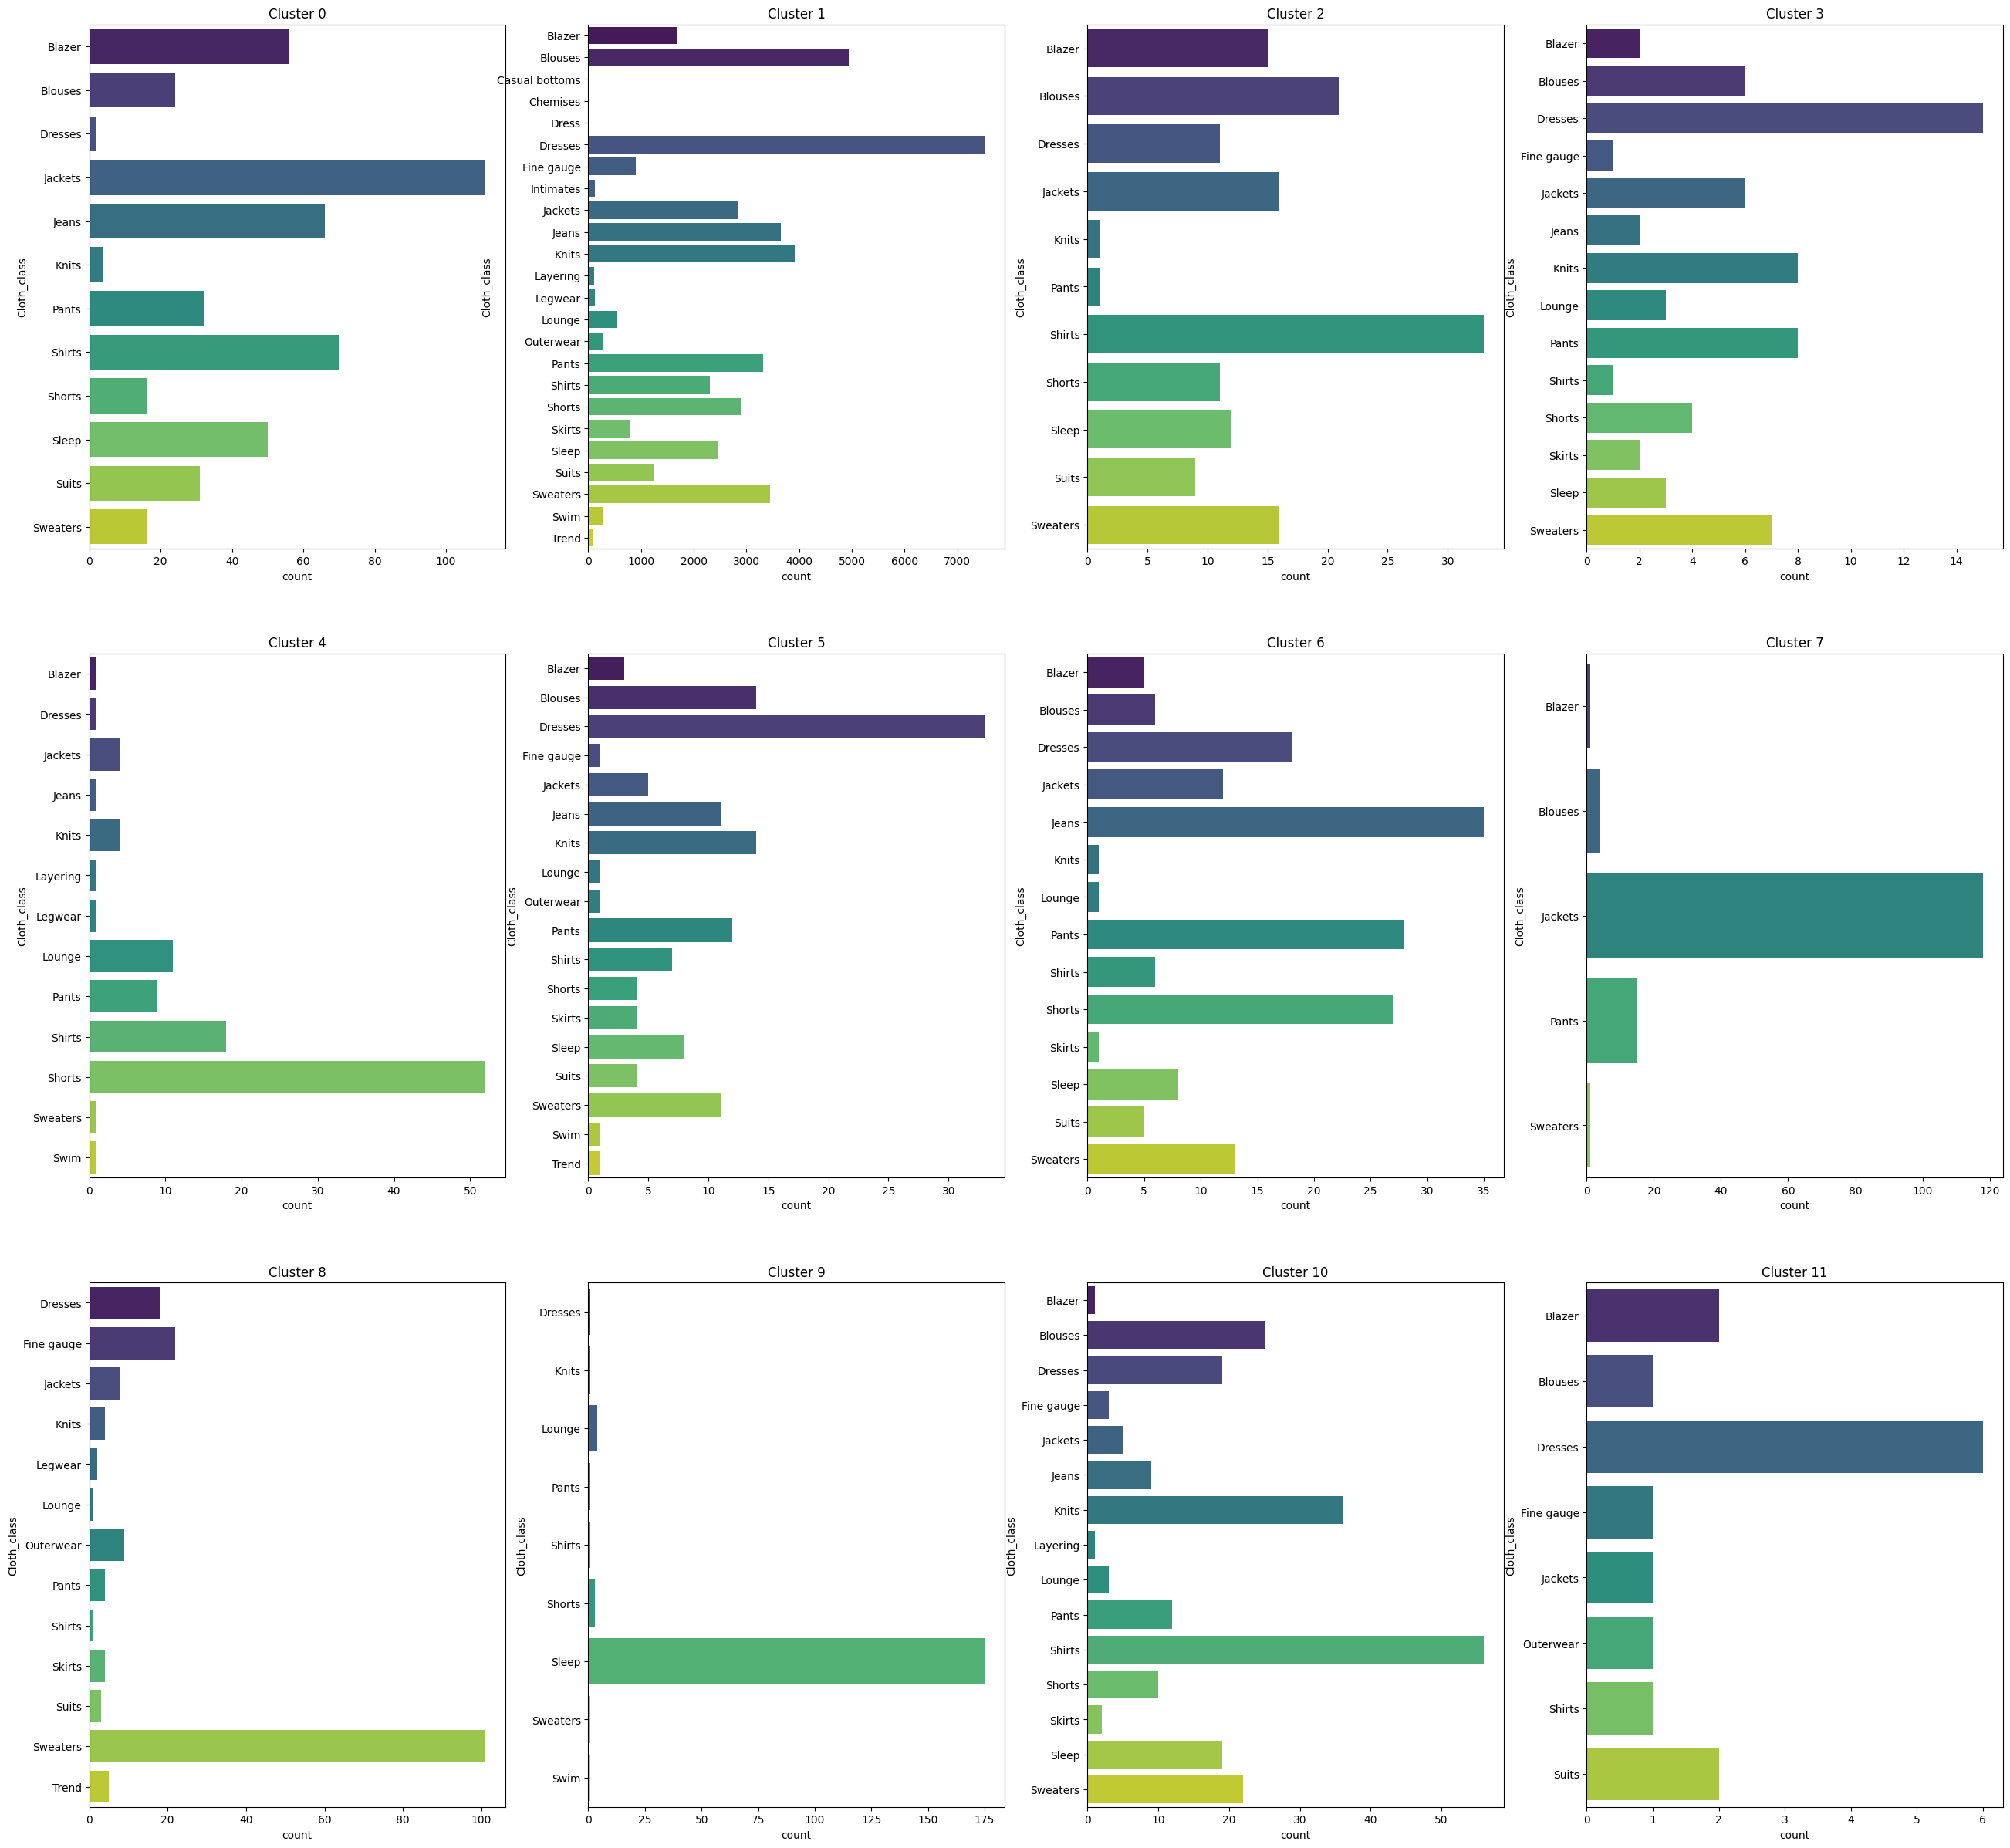

In [47]:
fig, axes = plt.subplots(3, 4, figsize = (32, 30))

for cluster in range(12):
    df_cluster_n = cluster_cloth[cluster_cloth['cluster'] == cluster]
    
    sns.barplot(
                y = df_cluster_n['Cloth_class'], 
                x = df_cluster_n['count'], 
                orient = 'h', 
                ax = axes[cluster//4][cluster%4], 
                palette = 'viridis'
               ).set_title(f"Cluster {cluster}")
    
plt.show()

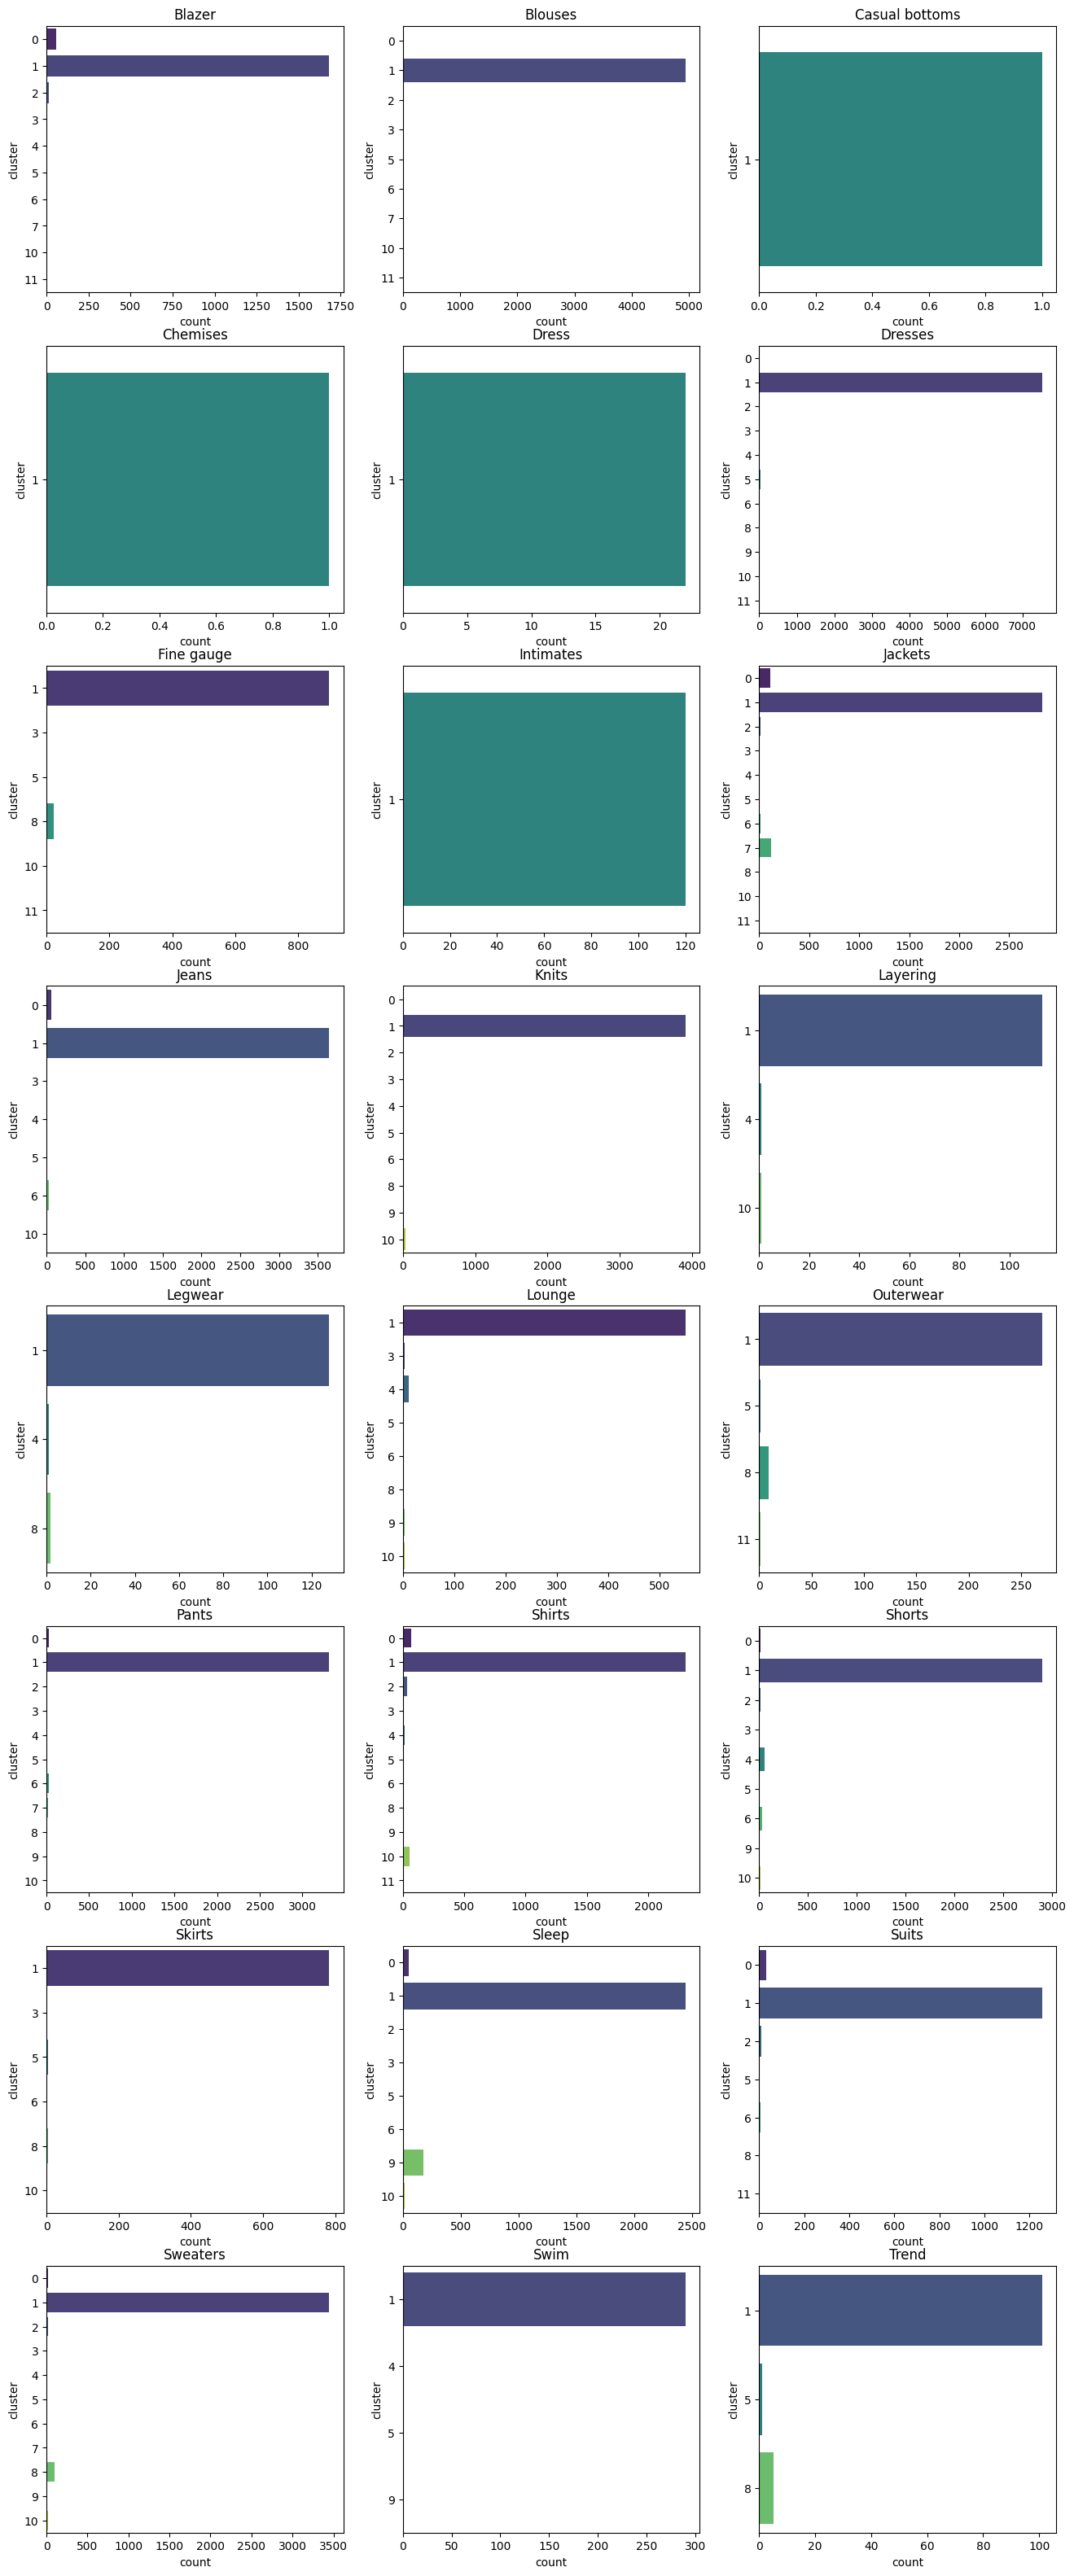

In [48]:
fig, axes = plt.subplots(8, 3, figsize = (16, 40))

for idx, cloth in enumerate(cluster_cloth['Cloth_class'].unique()):
    df_cluster_n = cluster_cloth[cluster_cloth['Cloth_class'] == cloth]
    
    sns.barplot(
                y = df_cluster_n['cluster'], 
                x = df_cluster_n['count'], 
                orient = 'h', 
                ax = axes[idx//3][idx%3],
                palette = 'viridis'
               ).set_title(f"{cloth}")
    
plt.show()

In [49]:
agg_cluster = AgglomerativeClustering(n_clusters = 12)

agg_cluster.fit(text_all.toarray())

AgglomerativeClustering(n_clusters=12)

In [50]:
agg_cluster_df = clean_df.copy()

agg_cluster_df['cluster'] = agg_cluster.labels_

display(agg_cluster_df)

,Title,Review,Cons_rating,Cloth_class,cluster
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,3
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,3
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses,3
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits,3
...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,3
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,1
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,1


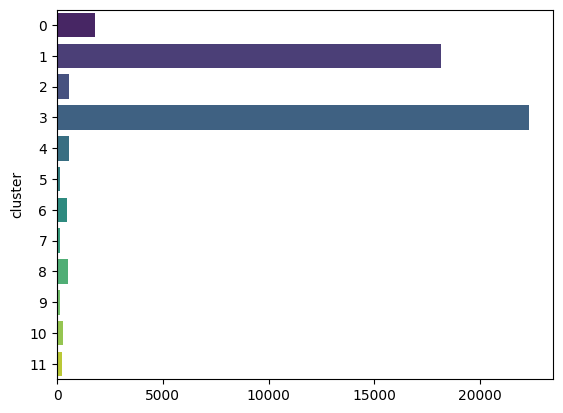

In [83]:
total_agg_cluster = agg_cluster_df['cluster'].value_counts()

sns.barplot(y = total_agg_cluster.index, x = total_agg_cluster.values, palette = 'viridis', orient = 'h')

plt.show()

In [51]:
agg_cluster_cloth = pd.DataFrame(agg_cluster_df.groupby(['cluster', 'Cloth_class'])[['cluster', 'Cloth_class']].value_counts()).reset_index().sort_values(by = 'Cloth_class')

display(agg_cluster_cloth)

,cluster,Cloth_class,count
0,0,Blazer,20
43,2,Blazer,87
82,4,Blazer,67
96,5,Blazer,2
107,6,Blazer,2
...,...,...,...
163,10,Trend,1
20,0,Trend,3
42,1,Trend,30
57,2,Trend,1


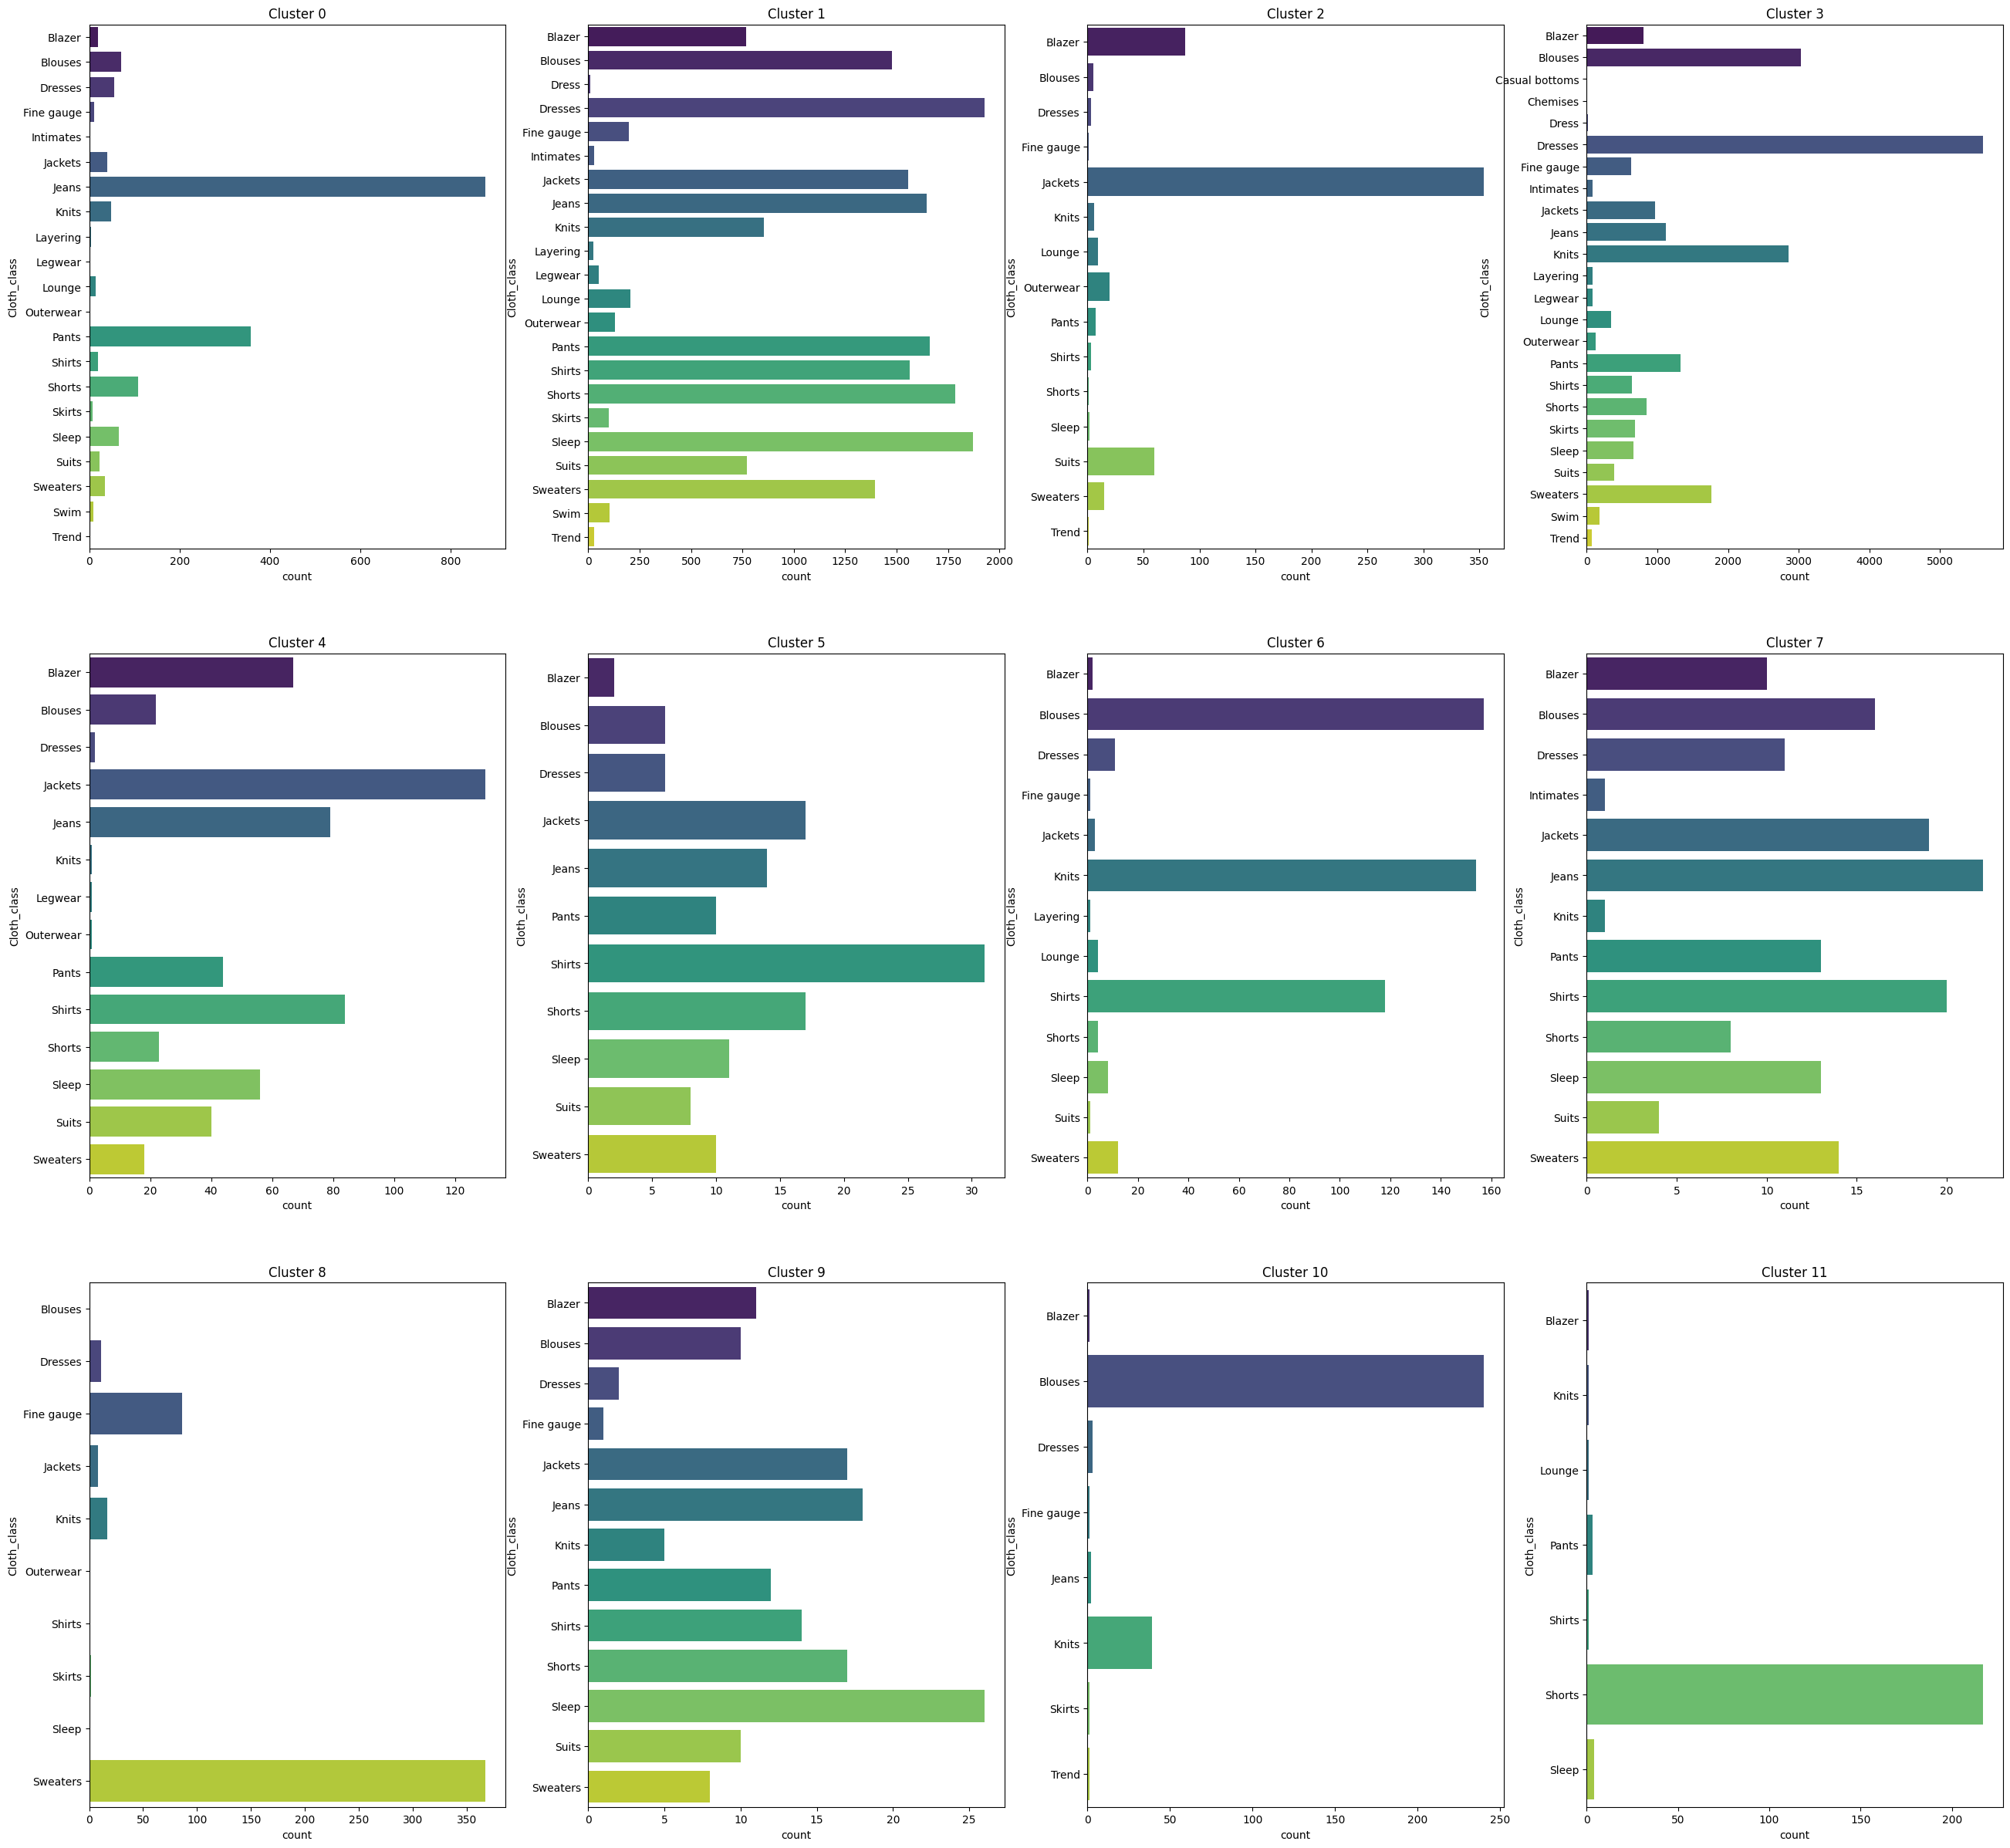

In [52]:
fig, axes = plt.subplots(3, 4, figsize = (32, 30))

for cluster in range(12):
    df_cluster_n = agg_cluster_cloth[agg_cluster_cloth['cluster'] == cluster]
    
    sns.barplot(
                y = df_cluster_n['Cloth_class'], 
                x = df_cluster_n['count'], 
                orient = 'h', 
                ax = axes[cluster//4][cluster%4], 
                palette = 'viridis'
               ).set_title(f"Cluster {cluster}")
    
plt.show()

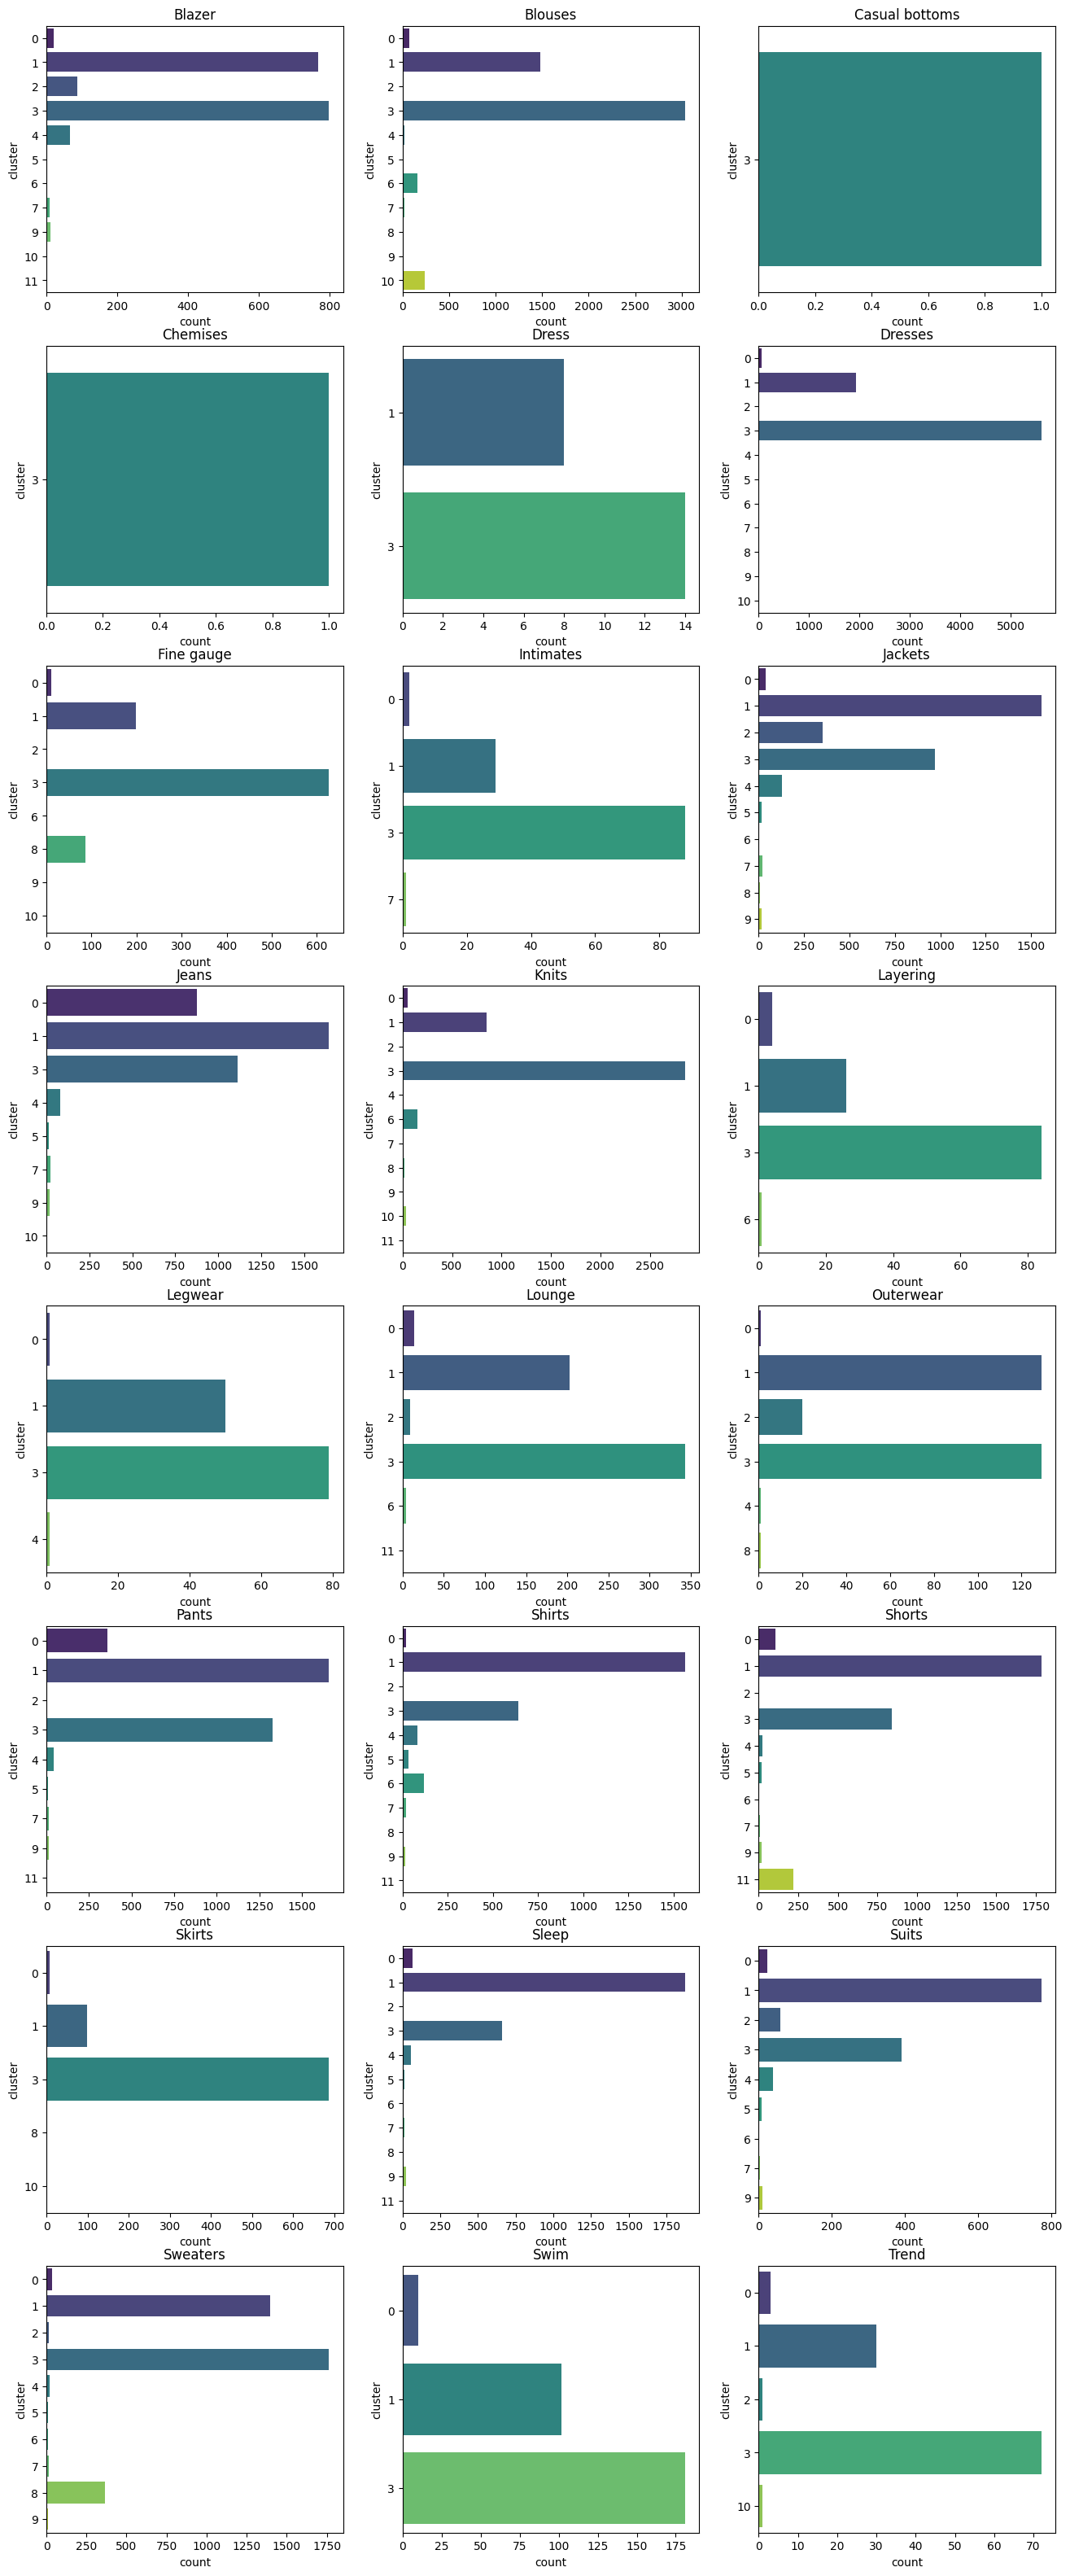

In [53]:
fig, axes = plt.subplots(8, 3, figsize = (16, 40))

for idx, cloth in enumerate(agg_cluster_cloth['Cloth_class'].unique()):
    df_cluster_n = agg_cluster_cloth[agg_cluster_cloth['Cloth_class'] == cloth]
    
    sns.barplot(
                y = df_cluster_n['cluster'], 
                x = df_cluster_n['count'], 
                orient = 'h', 
                ax = axes[idx//3][idx%3],
                palette = 'viridis'
               ).set_title(f"{cloth}")
    
plt.show()

In [78]:
dbscan = DBSCAN(min_samples = 100, n_jobs = 4, eps = 1, leaf_size = 400)

dbscan.fit(text_all)

DBSCAN(eps=1, leaf_size=400, min_samples=100, n_jobs=4)

In [79]:
dbscan_df = clean_df.copy()

dbscan_df['cluster'] = dbscan.labels_

display(dbscan_df)

,Title,Review,Cons_rating,Cloth_class,cluster
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses,0
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits,0
...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0


In [80]:
dbscan_cloth = pd.DataFrame(dbscan_df.groupby(['cluster', 'Cloth_class'])[['cluster', 'Cloth_class']].value_counts()).reset_index().sort_values(by = 'Cloth_class')

display(dbscan_cloth)

,cluster,Cloth_class,count
0,-1,Blazer,257
23,0,Blazer,1511
1,-1,Blouses,974
24,0,Blouses,4068
25,0,Casual bottoms,1
2,-1,Chemises,1
3,-1,Dress,3
26,0,Dress,19
4,-1,Dresses,1892
27,0,Dresses,5747


In [81]:
print(f"Number of clusters in dbscan = {len(dbscan_cloth['cluster'].unique())}")

Number of clusters in dbscan = 2


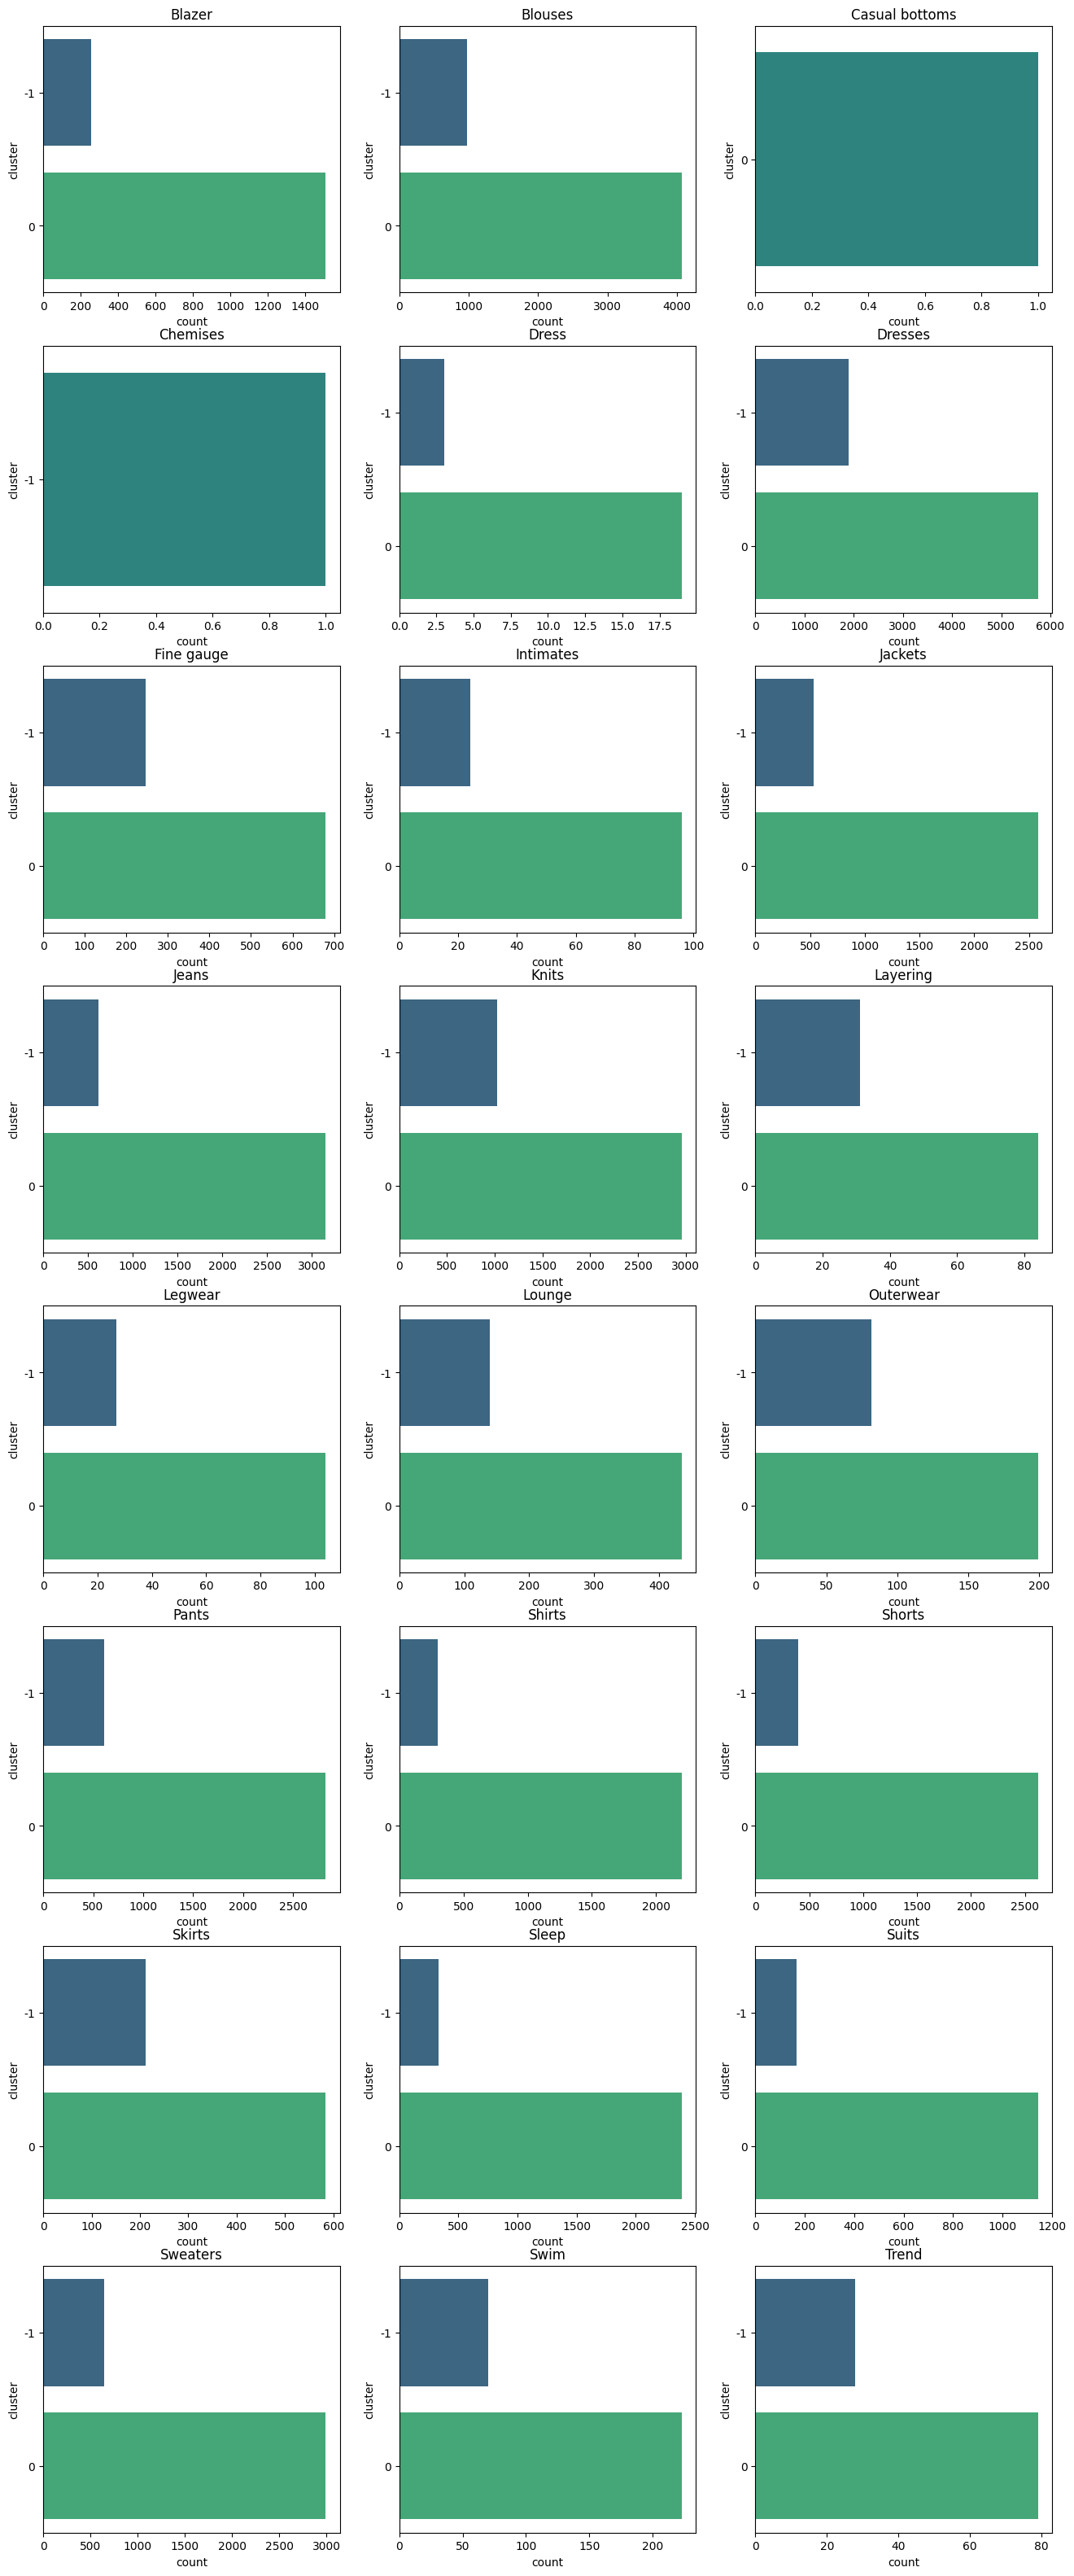

In [82]:
fig, axes = plt.subplots(8, 3, figsize = (16, 40))

for idx, cloth in enumerate(dbscan_cloth['Cloth_class'].unique()):
    df_cluster_n = dbscan_cloth[dbscan_cloth['Cloth_class'] == cloth]
    
    sns.barplot(
                y = df_cluster_n['cluster'], 
                x = df_cluster_n['count'], 
                orient = 'h', 
                ax = axes[idx//3][idx%3],
                palette = 'viridis'
               ).set_title(f"{cloth}")
    
plt.show()

In [96]:
mini_batch_kmeans = MiniBatchKMeans(n_clusters = 12, n_init = 504, random_state = 1)

mini_batch_kmeans.fit(text_all)

MiniBatchKMeans(n_clusters=12, n_init=504, random_state=1)

In [97]:
mini_batch_df = clean_df.copy()

mini_batch_df['cluster'] = mini_batch_kmeans.labels_

display(mini_batch_df)

,Title,Review,Cons_rating,Cloth_class,cluster
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,11
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,11
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,11
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2.0,Dresses,11
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5.0,Knits,11
...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,11
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,11
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,11
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,11


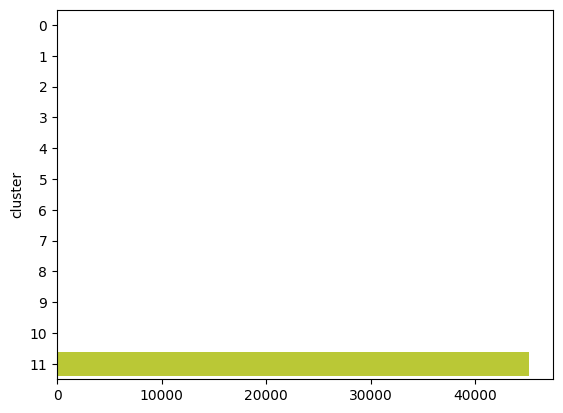

In [98]:
total_mini_batch = mini_batch_df['cluster'].value_counts()

sns.barplot(y = total_mini_batch.index, x = total_mini_batch.values, palette = 'viridis', orient = 'h')

plt.show()

In [ ]:
gaussian_mix = GaussianMixture(n_components = 12, n_init = 14)

gaussian_mix.fit(text_all.toarray())

In [ ]:
def cluster_results(cluster_model, text, df):
    cluster_model.fit(text)
    
    model_df = df.copy()
    
    model_df['cluster'] = cluster_model.labels_
    
    total_cluster = model_df['cluster'].value_counts()
    
    model_cloth = pd.DataFrame(model_df.groupby(['cluster', 'Cloth_class'])[['cluster', 'Cloth_class']].value_counts()).reset_index().sort_values(by = 'Cloth_class')
    
    return model_df, total_cluster, model_cloth

def plot_cloths_cluster(model_cloth):
    fig, axes = plt.subplots(8, 3, figsize = (16, 40))

    for idx, cloth in enumerate(model_cloth['Cloth_class'].unique()):
        df_cluster_n = model_cloth[model_cloth['Cloth_class'] == cloth]

        sns.barplot(
                    y = df_cluster_n['cluster'], 
                    x = df_cluster_n['count'], 
                    orient = 'h', 
                    ax = axes[idx//3][idx%3],
                    palette = 'viridis'
                   ).set_title(f"{cloth}")

    plt.show()

In [ ]:
def redefine_class(x):
    if x in {'Legwear', 'Casual Bottoms', 't'}: return 'Pants'
    elif x in {'Layering', ''}: return ''
    elif x in {'Suits'}: return 'Blazer'
    elif x in {'Intimates'}: return 'Sleep'
    elif x in {'Skirts', 'Dress'}: return 'Dresses'
    elif x in {'Fine gauge'}: return 'Knits'
    else: return x